# Online Training

A variation of SBI is Sequential Neural Posterior Estimation (SNPE), where the model is trained online, i.e., in multiple rounds. In each round, simulations are generated from the current posterior estimate, and the model is updated with these new simulations. This approach can be more efficient in terms of simulation budget, especially when the prior is broad and the posterior is narrow.

However, the model is no longer amortized, as it is specialized to the specific observation after training. This means that a new model must be trained for each new observation, which can be computationally expensive if many observations need to be analyzed.

In [1]:
from synference import SBI_Fitter

fitter = SBI_Fitter.init_from_hdf5(
    model_name="test", hdf5_path="../example_libraries/test_model_library.hdf5"
)

fitter.create_feature_array();

2025-11-06 17:57:27,171 | synference | INFO     | ---------------------------------------------
2025-11-06 17:57:27,174 | synference | INFO     | Features: 8 features over 100 samples
2025-11-06 17:57:27,175 | synference | INFO     | ---------------------------------------------
2025-11-06 17:57:27,175 | synference | INFO     | Feature: Min - Max
2025-11-06 17:57:27,175 | synference | INFO     | ---------------------------------------------
2025-11-06 17:57:27,176 | synference | INFO     | JWST/NIRCam.F070W: 7.131974 - 42.758 AB
2025-11-06 17:57:27,177 | synference | INFO     | JWST/NIRCam.F090W: 7.108530 - 39.933 AB
2025-11-06 17:57:27,177 | synference | INFO     | JWST/NIRCam.F115W: 7.012560 - 38.354 AB
2025-11-06 17:57:27,177 | synference | INFO     | JWST/NIRCam.F150W: 6.969396 - 36.997 AB
2025-11-06 17:57:27,178 | synference | INFO     | JWST/NIRCam.F200W: 7.133157 - 35.470 AB
2025-11-06 17:57:27,178 | synference | INFO     | JWST/NIRCam.F277W: 7.670149 - 33.243 AB
2025-11-06 17:5

Now we will recreate the simulator from the grid data stored in the HDF5 file.

In [4]:
fitter.recreate_simulator_from_library(
    override_library_path="../example_libraries/test_model_library.hdf5",
    override_grid_path="test_grid.hdf5",
);

params: {'fesc': 'fesc', 'fesc_ly_alpha': 'fesc_ly_alpha', 'dust_curve': <synthesizer.emission_models.transformers.dust_attenuation.PowerLaw object at 0x31be1ae60>}
2025-11-06 18:05:08,409 | synference | INFO     | Simulator recreated from grid at ../example_libraries/test_model_library.hdf5.


Now we can choose an observation for our multiple rounds of online training. Here, we will randomly select one of the simulations from our grid as the observation.

In [3]:
index = 20
sample = fitter.feature_array[index]
true_params = fitter.fitted_parameter_array[index]

sample

array([28.922905, 27.99003 , 27.05276 , 26.493101, 25.965355, 25.390919,
       24.99644 , 24.839458], dtype=float32)

Now we can run our online SBI model - to do this we set `learning_type` to 'online', specify the number of online rounds with 'num_online_rounds', and provide our chosen observation with 'online_training_xobs'. We also set the number of simulations per round with 'num_simulations'. The engine is set to 'SNPE' to use Sequential Neural Posterior Estimation, but SNLE and SNRE are also available for online training.

In [10]:
fitter.run_single_sbi(
    online_training_xobs=sample,
    learning_type="online",
    engine="SNPE",
    num_simulations=1000,
    num_online_rounds=4,
    override_prior_ranges={"peak_age": (10, 1000)},
    evaluate_model=False,
    plot=False,
);

2025-11-06 17:07:27,249 | synference | INFO     | ---------------------------------------------
2025-11-06 17:07:27,251 | synference | INFO     | Prior ranges:
2025-11-06 17:07:27,254 | synference | INFO     | ---------------------------------------------
2025-11-06 17:07:27,256 | synference | INFO     | redshift: 0.00 - 4.98 [dimensionless]
2025-11-06 17:07:27,258 | synference | INFO     | log_mass: 8.01 - 11.99 [log10_Msun]
2025-11-06 17:07:27,259 | synference | INFO     | tau_v: 0.01 - 3.00 [mag]
2025-11-06 17:07:27,259 | synference | INFO     | tau: 0.11 - 1.98 [dimensionless]
2025-11-06 17:07:27,260 | synference | INFO     | peak_age: 10.00 - 1000.00 [Myr]
2025-11-06 17:07:27,261 | synference | INFO     | log10metallicity: -3.98 - -1.41 [log10(Zmet)]
2025-11-06 17:07:27,261 | synference | INFO     | ---------------------------------------------
2025-11-06 17:07:27,283 | synference | INFO     | Processing prior...
2025-11-06 17:07:27,314 | synference | INFO     | Using provided xob

INFO:root:MODEL INFERENCE CLASS: SNPE
INFO:root:The first round of inference will use existing sims from the loader. Make sure that the simulations were run from the given proposal distribution for consistency.
INFO:root:Running round 1 / 4
INFO:root:Training model 1 / 1.


 Neural network successfully converged after 181 epochs.

  0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:root:Running round 2 / 4
INFO:root:Training model 1 / 1.


[tensor([[28.4545, 27.7843, 27.2514, 26.6597, 25.6598, 25.0273, 24.8764, 24.6092]]), tensor([[28.5593, 27.9688, 27.4209, 26.5518, 25.7268, 25.2509, 24.8942, 24.6184]]), tensor([[28.7692, 28.1051, 27.4406, 26.3284, 25.9103, 25.4454, 25.0771, 24.9433]]), tensor([[28.5894, 28.0894, 27.5645, 26.7280, 25.7553, 25.3126, 25.0025, 24.7487]]), tensor([[28.4637, 27.8412, 27.3001, 26.6489, 25.4024, 24.9969, 24.7105, 24.3675]]), tensor([[28.4412, 27.8768, 27.3219, 26.5517, 25.4173, 25.0050, 24.7442, 24.4547]]), tensor([[28.8844, 28.1739, 27.1165, 26.3074, 25.7910, 25.4224, 25.1076, 24.9116]]), tensor([[28.7600, 28.0644, 26.9156, 26.1294, 25.6310, 25.1966, 24.9326, 24.7039]]), tensor([[28.6629, 28.1701, 27.5956, 26.5929, 25.7770, 25.3793, 25.0333, 24.8069]]), tensor([[29.0648, 28.3534, 27.2886, 26.3675, 25.8954, 25.4127, 25.1059, 24.8281]]), tensor([[28.7551, 28.1762, 27.3078, 26.4387, 26.0220, 25.5487, 25.2048, 24.9235]]), tensor([[28.6730, 28.0108, 27.4356, 26.7878, 25.6905, 25.1940, 25.0819, 24.

  0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:root:Running round 3 / 4
INFO:root:Training model 1 / 1.


[tensor([[30.4070, 29.5722, 28.9913, 28.1736, 26.7141, 25.8226, 25.3772, 25.0952]]), tensor([[28.6426, 27.8425, 27.1703, 26.5779, 25.8817, 24.5726, 24.3009, 24.0595]]), tensor([[28.8806, 28.2464, 27.6325, 26.8119, 25.7466, 25.2516, 25.0330, 24.7476]]), tensor([[28.4124, 27.3061, 26.5569, 26.0171, 25.5295, 25.0224, 24.6318, 24.7245]]), tensor([[28.6447, 27.9516, 26.8479, 26.1503, 25.6423, 25.2581, 25.0246, 24.8184]]), tensor([[30.3414, 29.4594, 28.7315, 27.9234, 26.4451, 25.7383, 25.3813, 25.0910]]), tensor([[28.3598, 27.6747, 27.0438, 26.4999, 25.8478, 24.5819, 24.2889, 24.0652]]), tensor([[28.9483, 28.2048, 27.5360, 26.7030, 25.7184, 25.1382, 24.9945, 24.6944]]), tensor([[28.9735, 28.1674, 27.5351, 26.8770, 25.8670, 25.3227, 24.8713, 24.7965]]), tensor([[28.3381, 27.2734, 26.6940, 26.1866, 25.5820, 25.0406, 24.7707, 25.0268]]), tensor([[28.2968, 27.7457, 27.1816, 26.1707, 25.5823, 25.2550, 24.8862, 24.7435]]), tensor([[28.8723, 28.1761, 27.6273, 27.0004, 25.9044, 25.2365, 25.0009, 24.

  0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:root:Running round 4 / 4
INFO:root:Training model 1 / 1.


[tensor([[28.7511, 28.1527, 27.2966, 26.2441, 25.8515, 25.4244, 25.1045, 24.8594]]), tensor([[28.2011, 27.5842, 26.8370, 25.6531, 25.3647, 25.0160, 24.6863, 24.4840]]), tensor([[28.5914, 28.0152, 27.1596, 26.1614, 25.7583, 25.3095, 24.9808, 24.7222]]), tensor([[28.8444, 28.0555, 26.9140, 26.2508, 25.6666, 25.2759, 25.0392, 24.8298]]), tensor([[28.7779, 28.0257, 26.8932, 26.2211, 25.6539, 25.2646, 25.0296, 24.8278]]), tensor([[28.7910, 28.0783, 27.4559, 26.7428, 25.6592, 25.1145, 24.9873, 24.6921]]), tensor([[29.1060, 28.3323, 27.6925, 27.0162, 25.9061, 25.2398, 25.0748, 24.7793]]), tensor([[28.6553, 28.0620, 27.4762, 26.4038, 25.8583, 25.3049, 24.9149, 24.7237]]), tensor([[28.8897, 28.1576, 27.1739, 26.3039, 25.7635, 25.4372, 25.0958, 24.9165]]), tensor([[28.6230, 28.0891, 27.5035, 26.5762, 25.6056, 25.1351, 24.8174, 24.5576]]), tensor([[28.7562, 28.1245, 27.2338, 26.8044, 26.2799, 25.5986, 25.1810, 24.8561]]), tensor([[28.7725, 28.2012, 27.6351, 26.7587, 25.7893, 25.3058, 24.9569, 24.

INFO:root:It took 177.31782984733582 seconds to train models.
INFO:root:Saving model to /Users/user/Documents/PhD/synference/models/test


 Neural network successfully converged after 15 epochs.2025-11-06 17:10:24,845 | synference | INFO     | Time to train model(s): 0:02:57.597506
{'feature_names': ['JWST/NIRCam.F070W', 'JWST/NIRCam.F090W', 'JWST/NIRCam.F115W', 'JWST/NIRCam.F150W', 'JWST/NIRCam.F200W', 'JWST/NIRCam.F277W', 'JWST/NIRCam.F356W', 'JWST/NIRCam.F444W'], 'feature_units': ['AB', 'AB', 'AB', 'AB', 'AB', 'AB', 'AB', 'AB', 'AB'], 'fitted_parameter_units': array(['dimensionless', 'log10_Msun', 'mag', 'dimensionless', 'Myr',
       'log10(Zmet)'], dtype=object), 'fitted_parameter_names': array(['redshift', 'log_mass', 'tau_v', 'tau', 'peak_age',
       'log10metallicity'], dtype=object), 'timestamp': '20251106_171024', 'prior': Independent(CustomIndependentUniform(low: torch.Size([6]), high: torch.Size([6])), 1), 'library_path': '../example_grids/test_model_grid.hdf5', 'name': 'test', 'has_simulator': True, 'engine': 'SNPE', 'learning_type': 'online', 'ensemble_model_types': ['mdn'], 'ensemble_model_args': [{'hidden

(EnsemblePosterior sampler for potential_fn=<EnsemblePotential>,
 [{'epochs_trained': [0, 181, 53, 15, 15],
   'best_validation_loss': [inf, 6.3057018121083575],
   'validation_loss': [10.88215192159017,
    10.85964552561442,
    10.840068499247232,
    10.811481475830078,
    10.773674805959066,
    10.726300557454428,
    10.641343434651693,
    10.581462065378824,
    10.512848695119223,
    10.451125621795654,
    10.399666786193848,
    10.291070143381754,
    10.186397870381674,
    10.2133838335673,
    10.025770346323648,
    9.967493851979574,
    9.876080671946207,
    9.809850374857584,
    9.820050557454428,
    9.72950013478597,
    9.698690096537272,
    9.532173951466879,
    9.514049688975016,
    9.585336367289225,
    9.456165313720703,
    9.386285146077475,
    9.427265803019205,
    9.31201442082723,
    9.376885414123535,
    9.180492719014486,
    9.213119983673096,
    9.077567418416342,
    9.132145245869955,
    9.002501646677652,
    9.018316427866617,
    8

Now we can specifically see how the model performs on the conditioned observation.

Sampling from posterior: 100%|██████████| 1/1 [00:00<00:00, 40.91it/s]

2025-11-06 17:10:33,412 | synference | INFO     | [  2.53428698   9.997015     1.96876943   1.10013604 318.99194336
  -3.54894018]


  0%|          | 0/1000 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to /Users/user/Documents/PhD/synference/models/test/plots/test_0_plot_single_posterior.jpg...


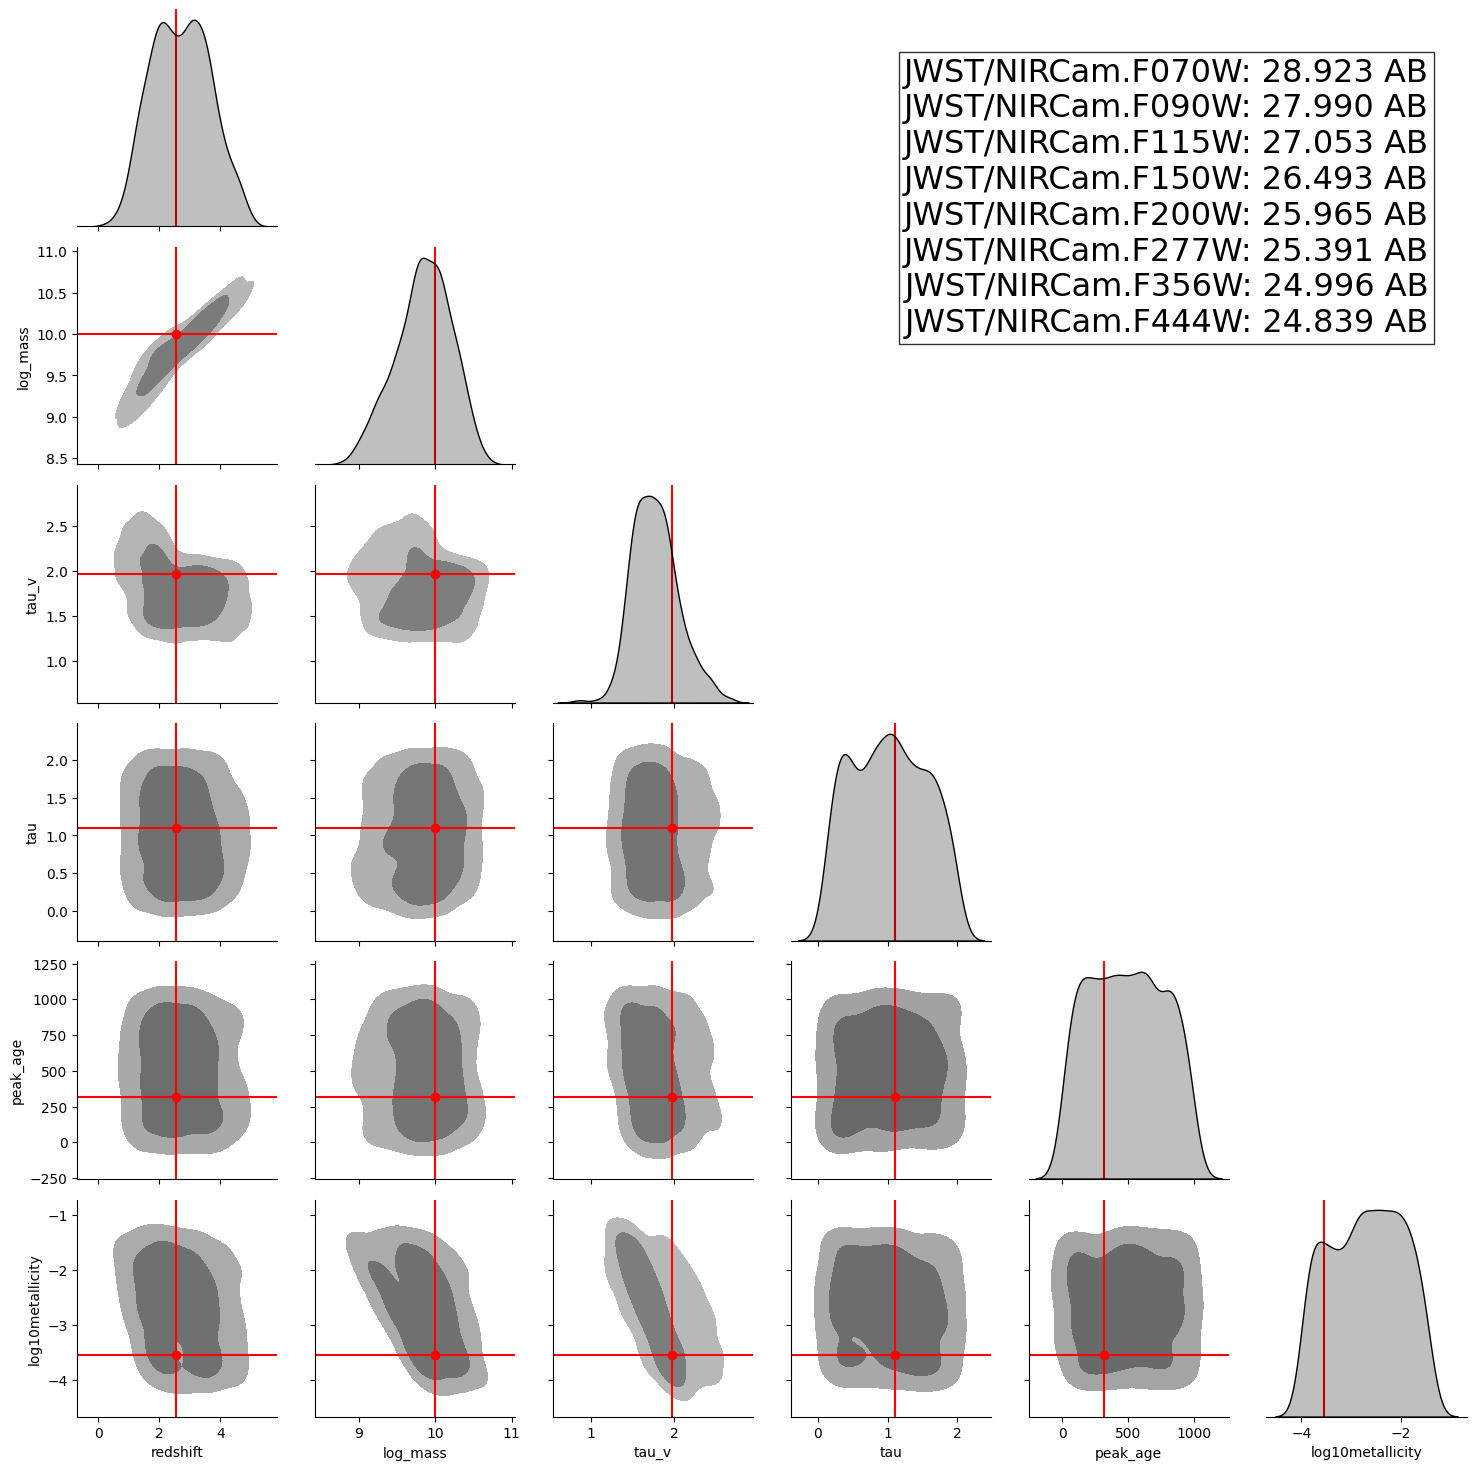

In [11]:
samples = fitter.sample_posterior(X_test=sample)

fitter.plot_posterior(
    X=sample,
    y=samples,
    num_samples=1000,
)